# Cleaning and Analyzing Employee Exit Data

This project will work with the data set of exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The DETE survey can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). 
<br><br>
In this project, we want to get information about the following questions:
- Are employees who only worked for the institute for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning to some kind of dissatisfaction? What about older employees?
<br><br>
We want to answer these questions by combining the results for both surveys. 

The main focus of this project is applying different data cleaning techniques like correcting missing values, verified the quality of our data, and created new columns

## Setting Up the Data Sets and Exploring Them

In [57]:
import pandas as pd
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [58]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [59]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [60]:
pd.options.display.max_columns = 150
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [61]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [62]:
dete_survey.shape

(822, 56)

In [63]:
tafe_survey.shape

(702, 72)

In [64]:
dete_survey.dtypes

ID                                      int64
SeparationType                         object
Cease Date                             object
DETE Start Date                        object
Role Start Date                        object
Position                               object
Classification                         object
Region                                 object
Business Unit                          object
Employment Status                      object
Career move to public sector             bool
Career move to private sector            bool
Interpersonal conflicts                  bool
Job dissatisfaction                      bool
Dissatisfaction with the department      bool
Physical work environment                bool
Lack of recognition                      bool
Lack of job security                     bool
Work location                            bool
Employment conditions                    bool
Maternity/family                         bool
Relocation                        

In [65]:
tafe_survey.dtypes

Record ID                                                                                                                                                        float64
Institute                                                                                                                                                         object
WorkArea                                                                                                                                                          object
CESSATION YEAR                                                                                                                                                   float64
Reason for ceasing employment                                                                                                                                     object
Contributing Factors. Career Move - Public Sector                                                                                                          

Exploring the dataframes, we can make multiple observations:
- Both dataframes contain a lot of columns and most of them are not needed for answering our project's questions
- Some columns of both dataframes contain the same information, but are labeled differently (e.g. 'Contributing Factors. Career Move - Public Sector' and 'Career move to public sector'
- The reasons for resigning can be found in multiple columns, not just in one
- The dete_survey dataframe contains 'Not States' values that indicated that values are missing.

## Identifying Missing Values and Dropping Unnecessary Columns

First, let's read in the dete_survey function again, but htis time reading the Not Stated values in as NaN.

In [66]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

Next, we'll drop some columns from each dataframe that we will not need to use for our analysis.

In [67]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [68]:
dete_survey_updated.shape

(822, 35)

In [69]:
tafe_survey_updated.shape

(702, 23)

In [70]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [71]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

## Cleaning Column Names

Next, let's change the column names so both dataframes column name conventions match each other.

In [72]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ',
                                                            '_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [73]:
tafe_survey_updated.columns = tafe_survey_updated.columns.str.lower().str.strip().str.replace(' ',
                                                            '_')
tafe_survey_updated.columns

Index(['record_id', 'institute', 'workarea', 'cessation_year',
       'reason_for_ceasing_employment',
       'contributing_factors._career_move_-_public_sector',
       'contributing_factors._career_move_-_private_sector',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._ill_health',
       'contributing_factors._maternity/family',
       'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction',
       'contributing_factors._interpersonal_conflict',
       'contributing_factors._study', 'contributing_factors._travel',
       'contributing_factors._other', 'contributing_factors._none',
       'gender._what_is_your_gender?', 'currentage._current_age',
       'employment_type._employment_type', 'classification._classification',
       'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)',
       'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)'],
      dtype='obje

Next, we will update some column names manually.

In [74]:
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis=1)

In [75]:
tafe_survey_updated.columns

Index(['record_id', 'institute', 'workarea', 'cessation_year',
       'reason_for_ceasing_employment',
       'contributing_factors._career_move_-_public_sector',
       'contributing_factors._career_move_-_private_sector',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._ill_health',
       'contributing_factors._maternity/family',
       'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction',
       'contributing_factors._interpersonal_conflict',
       'contributing_factors._study', 'contributing_factors._travel',
       'contributing_factors._other', 'contributing_factors._none',
       'gender._what_is_your_gender?', 'currentage._current_age',
       'employment_type._employment_type', 'classification._classification',
       'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)',
       'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)'],
      dtype='obje

In [76]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [77]:
tafe_survey_updated.head()

,record_id,institute,workarea,cessation_year,reason_for_ceasing_employment,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_self-employment,contributing_factors._ill_health,contributing_factors._maternity/family,contributing_factors._dissatisfaction,contributing_factors._job_dissatisfaction,contributing_factors._interpersonal_conflict,contributing_factors._study,contributing_factors._travel,contributing_factors._other,contributing_factors._none,gender._what_is_your_gender?,currentage._current_age,employment_type._employment_type,classification._classification,lengthofserviceoverall._overall_length_of_service_at_institute_(in_years),lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The tables seem to be in a way better shape now having a standardized convention for column names and mostly containing columns that are important for our analysis.

## Filtering the data

Since our goal is to better understand the reasons for people's resignation, we will only focus on rows where the reason_for_ceasing_employment (tafe) or seperationstype (dete) mentions 'Resignation' in some type of form. We have to be careful, though, since there are multiple resignation types with the string 'Resignation'. Let's create a frequency table for the counts of every unique value of the separationtypes.

In [78]:
unique_sep_tafe = tafe_survey_updated['reason_for_ceasing_employment'].value_counts()
unique_sep_tafe

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: reason_for_ceasing_employment, dtype: int64

In [79]:
unique_sep_dete = dete_survey_updated['separationtype'].value_counts()
unique_sep_dete

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

For the seperationtype in the tafe dateframe we can only focus on the 'Resignation' values, while the dete dataframe has three different types of resignation. Let's select only rows with resignation as seperation type.

In [80]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['reason_for_ceasing_employment']=='Resignation'].copy()
tafe_resignations.shape

(340, 23)

In [81]:
# Updating all resignation types of dete to Resignation
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
dete_resignations.shape

(311, 35)

We have 340 cases in tafe_resignations describing exits due to resignation and 311 cases in dete_resignation.

## Verifying the Data

In the next step, we want to verify in the best way possible that the data of both dataframes is accurate and not corrupted. First, we want to focus on the date columns.

In [82]:
# Checking the cease_date column
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

To make the data more consistent we are going extract just the year value for all values.

In [83]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [84]:
tafe_resignations['cessation_year'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cessation_year, dtype: int64

In [85]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

The results show that the date columns in both dataframes have value that seems to be accurate.

## Creating a new column

To analyze the number of years served in the institute, we have to calculate the difference from the start date variable and the cease date variable. 

In [86]:
tafe_resignations = tafe_resignations.rename(columns = {'lengthofservicecurrent._length_of_service_at_current_workplace_(in_years)':'institute_service'})
tafe_resignations.columns

Index(['record_id', 'institute', 'workarea', 'cessation_year',
       'reason_for_ceasing_employment',
       'contributing_factors._career_move_-_public_sector',
       'contributing_factors._career_move_-_private_sector',
       'contributing_factors._career_move_-_self-employment',
       'contributing_factors._ill_health',
       'contributing_factors._maternity/family',
       'contributing_factors._dissatisfaction',
       'contributing_factors._job_dissatisfaction',
       'contributing_factors._interpersonal_conflict',
       'contributing_factors._study', 'contributing_factors._travel',
       'contributing_factors._other', 'contributing_factors._none',
       'gender._what_is_your_gender?', 'currentage._current_age',
       'employment_type._employment_type', 'classification._classification',
       'lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)',
       'institute_service'],
      dtype='object')

tafe_resignations['institute_service'].unique()

In [87]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      92
1-2                   74
3-4                   54
5-6                   22
11-20                 21
7-10                  19
More than 20 years     8
Name: institute_service, dtype: int64

Fortunately, the tafe_resignations dataframe already has a variable that indicates the amount of years a person has worked in the institute. Now, let's create a column with the same information for the dete_resignations dataframe by substracting the start date from the cease date.

In [88]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [89]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

Now we have a better understanding of how long employees worked at the institute which is important because in this project we want to answer the following questions:
- Are employees who only worked for the institute for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

## Identifying Dissatisfied Employees

Like mentioned earlier, both dataframes have multiple columns that indicate dissatisfaction.

1.tafe_survey_updated

- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

2.detes_survey_updated

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If an employee indicated one of those factors, we will label him as dissatisfied in a new column.

In [90]:
tafe_resignations.head()

,record_id,institute,workarea,cessation_year,reason_for_ceasing_employment,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_self-employment,contributing_factors._ill_health,contributing_factors._maternity/family,contributing_factors._dissatisfaction,contributing_factors._job_dissatisfaction,contributing_factors._interpersonal_conflict,contributing_factors._study,contributing_factors._travel,contributing_factors._other,contributing_factors._none,gender._what_is_your_gender?,currentage._current_age,employment_type._employment_type,classification._classification,lengthofserviceoverall._overall_length_of_service_at_institute_(in_years),institute_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [91]:
tafe_resignations['contributing_factors._dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: contributing_factors._dissatisfaction, dtype: int64

In [92]:
tafe_resignations['contributing_factors._job_dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: contributing_factors._job_dissatisfaction, dtype: int64

There are 55 exiting employees with a general dissatisfaction and 62 employees with a job dissatisfaction. Let's create the new column.

In [93]:
# Writing a functions that we will use to populate the new column
import numpy as np

def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
# Applying the new function to create a new column. Using applymap method
# to apply the function and the any method to check for both columns
tafe_resignations['dissatisfied'] = tafe_resignations[['contributing_factors._dissatisfaction',
                                                       'contributing_factors._job_dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up.head()

,record_id,institute,workarea,cessation_year,reason_for_ceasing_employment,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_self-employment,contributing_factors._ill_health,contributing_factors._maternity/family,contributing_factors._dissatisfaction,contributing_factors._job_dissatisfaction,contributing_factors._interpersonal_conflict,contributing_factors._study,contributing_factors._travel,contributing_factors._other,contributing_factors._none,gender._what_is_your_gender?,currentage._current_age,employment_type._employment_type,classification._classification,lengthofserviceoverall._overall_length_of_service_at_institute_(in_years),institute_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [94]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [95]:
tafe_resignations_up.shape

(340, 24)

In [96]:
# Doing the same process for the dete_resignations dataframe
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department',
                                                      'physical_work_environment', 'lack_of_recognition',
                                                      'lack_of_job_security', 'work_location', 'employment_conditions',
                                                      'work_life_balance', 'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up.head()


,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


In [97]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [98]:
dete_resignations_up.shape

(311, 37)

We can see that roughly 26% of the exiting employee tafe_resignation_up dataframe have been dissatisfied, while around 48% of the dete_resignations_up have been feeling that way. This can be due to the higher number of dissatisfaction factors in the later dataframe.

## Combining the Data

The next step will be to aggregate the data from both dataframes. Before we can do this we have to add an additional columns to each dataframe for labeling purposes. After combining the dataframes we can drop unimportant columns. 

In [100]:
# Adding labeling column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [102]:
# Combining both dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], 
                    ignore_index=True)
combined.head()

,aboriginal,age,business_unit,career_move_to_private_sector,career_move_to_public_sector,cease_date,cessation_year,classification,classification._classification,contributing_factors._career_move_-_private_sector,contributing_factors._career_move_-_public_sector,contributing_factors._career_move_-_self-employment,contributing_factors._dissatisfaction,contributing_factors._ill_health,contributing_factors._interpersonal_conflict,contributing_factors._job_dissatisfaction,contributing_factors._maternity/family,contributing_factors._none,contributing_factors._other,contributing_factors._study,contributing_factors._travel,currentage._current_age,dete_start_date,disability,dissatisfaction_with_the_department,dissatisfied,employment_conditions,employment_status,employment_type._employment_type,gender,gender._what_is_your_gender?,id,ill_health,institute,institute_service,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,lengthofserviceoverall._overall_length_of_service_at_institute_(in_years),maternity/family,nesb,none_of_the_above,physical_work_environment,position,reason_for_ceasing_employment,record_id,region,relocation,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workarea,workload
0,NaN,36-40,NaN,True,False,2012.0,NaN,Primary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0,NaN,False,False,False,Permanent Full-time,NaN,Female,NaN,4.0,False,DETE,7,False,False,False,False,NaN,False,NaN,False,False,Teacher,NaN,NaN,Central Queensland,False,2006.0,Resignation,NaN,False,NaN,False,False,False,NaN,False
1,NaN,41-45,Education Queensland,True,False,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994.0,NaN,False,True,True,Permanent Full-time,NaN,Female,NaN,6.0,False,DETE,18,False,False,False,False,NaN,True,NaN,False,False,Guidance Officer,NaN,NaN,Central Office,False,1997.0,Resignation,NaN,False,NaN,False,False,False,NaN,False
2,NaN,31-35,NaN,True,False,2012.0,NaN,Secondary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,False,False,False,Permanent Full-time,NaN,Female,NaN,9.0,False,DETE,3,False,False,False,False,NaN,False,NaN,False,False,Teacher,NaN,NaN,North Queensland,False,2009.0,Resignation,NaN,False,NaN,False,False,False,NaN,False
3,NaN,46-50,NaN,False,False,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997.0,NaN,True,True,False,Permanent Part-time,NaN,Female,NaN,10.0,False,DETE,15,True,True,False,False,NaN,False,NaN,False,False,Teacher Aide,NaN,NaN,NaN,False,2008.0,Resignation,NaN,False,NaN,False,False,False,NaN,False
4,NaN,31-35,NaN,False,False,2012.0,NaN,Secondary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,NaN,False,False,False,Permanent Full-time,NaN,Male,NaN,12.0,False,DETE,3,False,False,False,False,NaN,True,NaN,False,False,Teacher,NaN,NaN,Far North Queensland,True,2009.0,Resignation,NaN,False,NaN,False,False,False,NaN,False


In [103]:
combined.shape

(651, 59)

In [104]:
# Generating the sum of non null values for each column
combined.notnull().sum().sort_values()

torres_strait                                                                  0
south_sea                                                                      3
aboriginal                                                                     7
disability                                                                     8
nesb                                                                           9
business_unit                                                                 32
classification                                                               161
region                                                                       265
role_start_date                                                              271
dete_start_date                                                              283
classification._classification                                               290
lengthofserviceoverall._overall_length_of_service_at_institute_(in_years)    290
gender._what_is_your_gender?

Next, we will drop columns that have less than 500 non null values

In [106]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [107]:
combined_updated.head()

,dissatisfied,institute,institute_service
0,False,DETE,7
1,True,DETE,18
2,False,DETE,3
3,True,DETE,15
4,False,DETE,3


In [108]:
combined_updated.shape

(651, 3)

The new dataframe contains only the information we need to answer our questions defined at the beginning of the project.

## Cleaning the Service Column

In [112]:
combined['institute_service'].value_counts()

Less than 1 year      92
1-2                   74
3-4                   54
5.0                   23
1.0                   22
5-6                   22
11-20                 21
3.0                   20
0.0                   20
7-10                  19
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years     8
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
14.0                   6
22.0                   6
17.0                   6
12.0                   6
16.0                   5
18.0                   5
23.0                   4
11.0                   4
24.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2
49.0                   1


The last thing we have to do before we can analyze the data is to clean the service column since it not only contains integer values but also type periods like 11-20. Therefore, we will modify the column by categorizing the year values like the following:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [120]:
# Extracting the years of service by transforming the values into strings
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
# Transforming the values back to float
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
# Ensuring that we only have float values
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


1.0     188
3.0      74
5.0      45
7.0      32
11.0     25
0.0      20
6.0      17
4.0      16
20.0     15
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [126]:
# Creating a function to transform the value
def categorize_service(value):
    if value>=11:
        return 'Veteran'
    elif 7 <= value <11:
        return 'Established'
    elif 3 <= value <7:
        return 'Experienced'
    elif pd.isnull(value):
        return np.nan
    else:
        return 'New'

# Transforming the values
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(categorize_service)
combined_updated['service_cat'].head()

0    Established
1        Veteran
2    Experienced
3        Veteran
4    Experienced
Name: service_cat, dtype: object

In [127]:
combined_updated['service_cat'].value_counts()

New            222
Experienced    152
Veteran        129
Established     60
Name: service_cat, dtype: int64

We can see that the majority of exiting employees rather new to the institute.

## Performing Initial Analysis

Last, let's try to answer the questions that lead us to start the project:
- Are employees who only worked for the institute for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning to some kind of dissatisfaction? What about older employees?

In [128]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [130]:
# Filling the 8 NaN with False, since it is the more common Boolean type
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [131]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [137]:
# Calculating the percentage of dissatisfied employees per service group using a pivot table
pivot = combined_updated.pivot_table('dissatisfied','service_cat')
pivot

,dissatisfied
service_cat,
Established,0.500000
Experienced,0.348684
New,0.292793
Veteran,0.511628


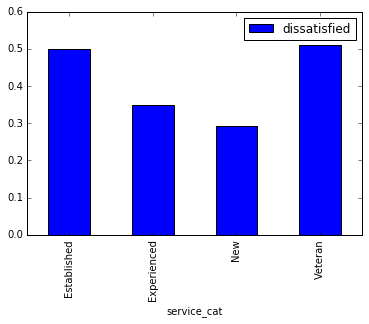

In [138]:
# Visualizing the pivot table
%matplotlib inline
pivot.plot(kind='bar')

Questions:
- Are employees who only worked for the institute for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning to some kind of dissatisfaction? What about older employees?

We can say that employees with bigger experience (7 years or more) are more likely to resign than people with less experience. Since both of the original dataframes measure different dissatisfaction types, it is hard to analyze the exact reasons for dissatisfaction from this poin on. This analysis has to be done by starting again with the cleaned version of each dataframe separately. 

## Conclusion

In this project we cleared messy data from two dataframes and combined them in the end. On the way we corrected missing values, verified the quality of our data, and created new columns.